# Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

from pandas import read_excel, DataFrame,to_datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [74]:
np.random.seed(143)

# Load Data

In [2]:
data_file_path = r'data (1).xlsx'

meta_data_df = read_excel(data_file_path,sheet_name=0)
meta_data_df.head()

,Columns,Description,Variable
0,appointmentId,Unique id,Independent
1,inspectionStartTime,inspection date,Independent
2,year,registration year,Independent
3,month,registration month,Independent
4,engineTransmission_battery_value,condition ok: yes\nelse : no,Independent


In [3]:
engine_df = read_excel(data_file_path,sheet_name=1)
engine_df['inspectionStartTime'] = pd.to_datetime(engine_df['inspectionStartTime'])
engine_df.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348,3.5
3,aj_04,2019-01-18 11:02:53,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,48233,3.5
4,aj_05,2019-01-27 12:12:06,2011,7,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,74368,4.0


In [4]:
orig_cols = engine_df.columns.tolist()

# Data Preprocessing

## Target column encoding

In [5]:
# creating a mapping for target varaible and making it as a classification problem
# since the values are fixed.
trgt_col_map = {0.5:'A',
                1.0:'B',
                1.5:'C',
                2.0:'D',
                2.5:'E',
                3.0:'F',
                3.5:'G',
                4.0:'H',
                4.5:'I',
                5.0:'J'
                }

## EDA

In [6]:
df_dups = engine_df.drop(['appointmentId','inspectionStartTime'],axis=1)
df_dups = df_dups.drop_duplicates()


In [7]:
# There are 6 duplicate rows present in the data
df_dups.reset_index(drop=True)

,index,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,0,2008,8,No,Weak,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,1,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,2,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348,3.5
3,3,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,48233,3.5
4,4,2011,7,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,74368,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296,26302,2013,3,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,Electrical wiring Damaged,NaN,NaN,NaN,NaN,Petrol + CNG,64532,4.0
26297,26303,2007,8,No,Weak,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,88051,4.0
26298,26304,2004,7,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,22656,3.5
26299,26305,2010,12,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,126015,4.5


In [8]:

df_dups.describe()
## here we dont get to see much information about the dataframe, since the variables are of object type

,year,month,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_cc_value_10,odometer_reading,rating_engineTransmission
count,26301.000000,26301.000000,0.0,0.0,26301.000000,26301.000000
mean,2010.857914,5.462568,NaN,NaN,76459.518155,3.625147
std,3.765543,3.584008,NaN,NaN,46766.580461,0.846966
min,1989.000000,1.000000,NaN,NaN,1.000000,0.500000
25%,2008.000000,2.000000,NaN,NaN,46383.000000,3.500000
50%,2011.000000,5.000000,NaN,NaN,72013.000000,4.000000
75%,2014.000000,9.000000,NaN,NaN,98289.000000,4.000000
max,2019.000000,12.000000,NaN,NaN,999999.000000,5.000000


In [9]:
# Its crucial to treat training and testing data separately
X_train, X_test, y_train, y_test = train_test_split(engine_df.drop(['rating_engineTransmission'],axis=1), engine_df['rating_engineTransmission'], test_size=0.2, random_state=143)
train_df = pd.concat([X_train,y_train], axis=1)
test_df = pd.concat([X_test,y_test], axis=1)
train_df

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
6682,aj_6683,2019-01-14 13:27:42,2015,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,103268,4.0
16687,aj_16688,2019-02-02 14:14:06,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,99960,3.5
15535,aj_15536,2019-02-26 14:44:09,2017,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,4082,5.0
223,aj_224,2019-02-17 15:02:33,2007,7,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,88405,3.0
7848,aj_7849,2019-03-09 16:57:30,2012,4,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Electrical wiring Damaged,NaN,NaN,NaN,NaN,Diesel,74153,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,aj_16547,2019-02-24 17:08:16,2010,10,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,61819,3.0
25121,aj_25122,2019-02-09 14:26:54,2008,3,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,40496,4.0
17937,aj_17938,2019-04-10 15:55:31,2012,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,54026,4.0
2201,aj_2202,2019-01-31 12:51:03,2004,1,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,133966,3.0


In [10]:
# check for dtypes
df_dtypes = engine_df.dtypes
df_dtypes

appointmentId                                  object
inspectionStartTime                    datetime64[ns]
year                                            int64
month                                           int64
engineTransmission_battery_value               object
                                            ...      
engineTransmission_comments_value_3            object
engineTransmission_comments_value_4            object
fuel_type                                      object
odometer_reading                                int64
rating_engineTransmission                     float64
Length: 73, dtype: object

In [11]:
train_df = train_df.drop(['appointmentId'],axis=1)
train_df

,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
6682,2019-01-14 13:27:42,2015,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,103268,4.0
16687,2019-02-02 14:14:06,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,99960,3.5
15535,2019-02-26 14:44:09,2017,1,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,4082,5.0
223,2019-02-17 15:02:33,2007,7,No,Weak,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,88405,3.0
7848,2019-03-09 16:57:30,2012,4,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,Electrical wiring Damaged,NaN,NaN,NaN,NaN,Diesel,74153,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,2019-02-24 17:08:16,2010,10,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,61819,3.0
25121,2019-02-09 14:26:54,2008,3,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,40496,4.0
17937,2019-04-10 15:55:31,2012,1,Yes,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,54026,4.0
2201,2019-01-31 12:51:03,2004,1,No,Weak,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,133966,3.0


## Handling missing values

In [12]:
#check for nan values and its percentage 
missing_perc = (train_df.isna().sum()/ train_df.shape[0])*100
missing_perc

inspectionStartTime                       0.000000
year                                      0.000000
month                                     0.000000
engineTransmission_battery_value          0.000000
engineTransmission_battery_cc_value_0    87.127584
                                           ...    
engineTransmission_comments_value_3      99.771917
engineTransmission_comments_value_4      99.942979
fuel_type                                 0.000000
odometer_reading                          0.000000
rating_engineTransmission                 0.000000
Length: 72, dtype: float64

In [13]:
# filter the columns with more than 50% of nan/missing values
# and remove these columns as they don't hold any significant info
## HERE 50% is INDUSTRY standards
missing_perc_80 = missing_perc[missing_perc > 80]
missing_perc_80

engineTransmission_battery_cc_value_0                    87.127584
engineTransmission_battery_cc_value_1                    98.384414
engineTransmission_battery_cc_value_2                    99.748159
engineTransmission_battery_cc_value_3                    99.938228
engineTransmission_battery_cc_value_4                    99.985745
engineTransmission_engineOilLevelDipstick_cc_value_0     98.541221
engineTransmission_engineOil_cc_value_3                  85.816108
engineTransmission_engineOil_cc_value_4                  93.309575
engineTransmission_engineOil_cc_value_5                  97.709670
engineTransmission_engineOil_cc_value_6                  99.539083
engineTransmission_engineOil_cc_value_7                  99.947731
engineTransmission_engineOil_cc_value_8                  99.990497
engineTransmission_engineOil_cc_value_9                 100.000000
engineTransmission_engine_cc_value_1                     80.750772
engineTransmission_engine_cc_value_2                     91.13

In [14]:
missing_cols = missing_perc_80.index.tolist()
train_df = train_df.drop( missing_cols, axis=1)
train_df

,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,...,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
6682,2019-01-14 13:27:42,2015,5,Yes,Yes,Yes,NaN,NaN,NaN,Yes,...,Yes,NaN,Yes,NO Blow-by,No,Hard,Yes,Petrol + CNG,103268,4.0
16687,2019-02-02 14:14:06,2013,1,Yes,Yes,No,Leaking,Dirty,Leakage from Tappet Cover,No,...,Yes,NaN,Yes,NO Blow-by,No,Spongy,Yes,Petrol,99960,3.5
15535,2019-02-26 14:44:09,2017,1,Yes,Yes,Yes,NaN,NaN,NaN,Yes,...,Yes,NaN,Yes,NO Blow-by,Yes,NaN,Yes,Petrol,4082,5.0
223,2019-02-17 15:02:33,2007,7,No,Yes,No,Dirty,NaN,NaN,No,...,Yes,NaN,Yes,NO Blow-by,No,Hard,Yes,Petrol,88405,3.0
7848,2019-03-09 16:57:30,2012,4,Yes,Yes,No,Dirty,NaN,NaN,Yes,...,Yes,NaN,No,Back Compression Exist,No,Auto Transmission Not Satisfactory,No,Diesel,74153,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,2019-02-24 17:08:16,2010,10,Yes,Yes,No,Leakage from Tappet Cover,NaN,NaN,No,...,No,Silencer assembly damaged,Yes,NO Blow-by,Yes,NaN,Yes,Petrol + CNG,61819,3.0
25121,2019-02-09 14:26:54,2008,3,Yes,Yes,No,Dirty,Leakage from Side cover,NaN,Yes,...,No,Noise from silencer assembly,Yes,NO Blow-by,No,Hard,No,Petrol,40496,4.0
17937,2019-04-10 15:55:31,2012,1,Yes,Yes,Yes,NaN,NaN,NaN,Yes,...,Yes,NaN,Yes,NO Blow-by,Yes,NaN,Yes,Diesel,54026,4.0
2201,2019-01-31 12:51:03,2004,1,No,Yes,No,Level Low,Leaking,Leakage from Tappet Cover,No,...,Yes,NaN,No,Back Compression Exist,No,Hard,Yes,Petrol,133966,3.0


In [15]:
# check for unique values i.e variance of data

# variances = train_df.nunique()
# variances

In [16]:
# df_dups = df_filtr.drop(['inspectionStartTime'],axis=1)
# df_dups = df_dups.drop_duplicates()
# df_dups.reset_index()

## Data Encoding


In [17]:
# check for only object type columns
string_cols = train_df.select_dtypes(include='object').columns.tolist()
string_cols

['engineTransmission_battery_value',
 'engineTransmission_engineoilLevelDipstick_value',
 'engineTransmission_engineOil',
 'engineTransmission_engineOil_cc_value_0',
 'engineTransmission_engineOil_cc_value_1',
 'engineTransmission_engineOil_cc_value_2',
 'engineTransmission_engine_value',
 'engineTransmission_engine_cc_value_0',
 'engineTransmission_coolant_value',
 'engineTransmission_coolant_cc_value_0',
 'engineTransmission_engineMounting_value',
 'engineTransmission_engineMounting_cc_value_0',
 'engineTransmission_engineSound_value',
 'engineTransmission_engineSound_cc_value_0',
 'engineTransmission_engineSound_cc_value_1',
 'engineTransmission_engineSound_cc_value_2',
 'engineTransmission_exhaustSmoke_value',
 'engineTransmission_exhaustSmoke_cc_value_0',
 'engineTransmission_engineBlowByBackCompression_value',
 'engineTransmission_engineBlowByBackCompression_cc_value_0',
 'engineTransmission_clutch_value',
 'engineTransmission_clutch_cc_value_0',
 'engineTransmission_gearShifting

In [18]:
# Create a LabelEncoder instance for each column
encoders = {}
for col in string_cols:
    # initiate the encoder model
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    encoders[col] = le

train_df

,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,...,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
6682,2019-01-14 13:27:42,2015,5,1,1,1,9,8,7,1,...,1,6,1,1,0,3,1,4,103268,4.0
16687,2019-02-02 14:14:06,2013,1,1,1,0,5,0,3,0,...,1,6,1,1,0,6,1,3,99960,3.5
15535,2019-02-26 14:44:09,2017,1,1,1,1,9,8,7,1,...,1,6,1,1,1,7,1,3,4082,5.0
223,2019-02-17 15:02:33,2007,7,0,1,0,0,8,7,0,...,1,6,1,1,0,3,1,3,88405,3.0
7848,2019-03-09 16:57:30,2012,4,1,1,0,0,8,7,1,...,1,6,0,0,0,0,0,0,74153,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,2019-02-24 17:08:16,2010,10,1,1,0,3,8,7,0,...,0,4,1,1,1,7,1,4,61819,3.0
25121,2019-02-09 14:26:54,2008,3,1,1,0,0,1,7,1,...,0,3,1,1,0,3,0,3,40496,4.0
17937,2019-04-10 15:55:31,2012,1,1,1,1,9,8,7,1,...,1,6,1,1,1,7,1,0,54026,4.0
2201,2019-01-31 12:51:03,2004,1,0,1,0,6,5,3,0,...,1,6,0,0,0,3,1,3,133966,3.0


## Outlier Detection

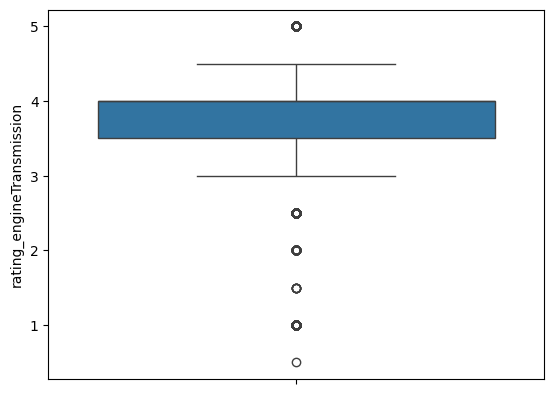

In [19]:
sns.boxplot(train_df['rating_engineTransmission'])
plt.show()

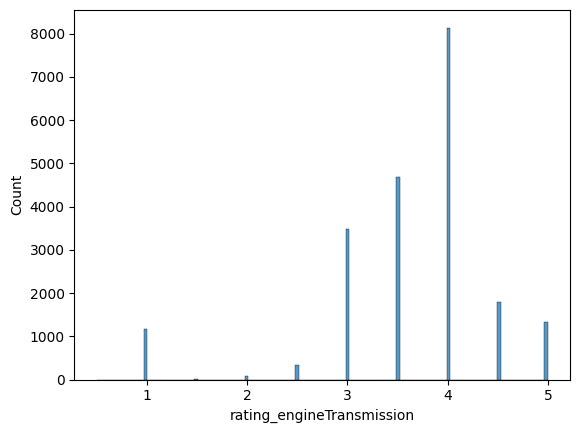

In [20]:
sns.histplot(train_df['rating_engineTransmission'])
plt.show()

In [21]:
engine_rat_outliers = train_df[train_df['rating_engineTransmission']<2]
# engine_rat_outliers

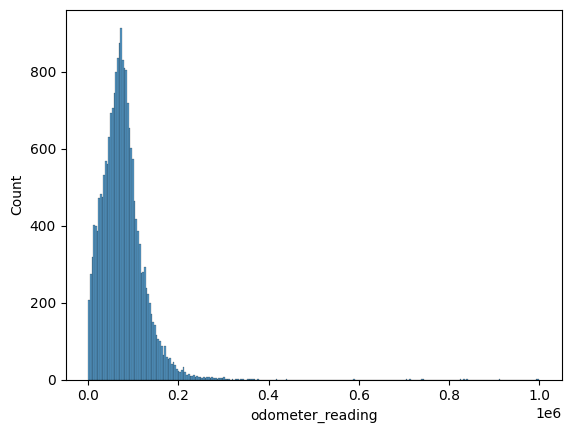

In [22]:
# Odometer values distribution
sns.histplot(train_df['odometer_reading'])#, y=train_df['rating_engineTransmission'])
plt.show()

In [23]:
# a. Log Transformation  
train_df['odometer_reading'] = np.log(train_df['odometer_reading'] + 1)
# scaler_log = StandardScaler()
# scaler_log_mdl = scaler_log.fit(train_df[['odometer_reading']])
# train_df[['odometer_reading']] = scaler_log_mdl.transform(train_df[['odometer_reading']])


# 2. Robust Scaling
robust_scaler = RobustScaler()
robust_scaler_mdl = robust_scaler.fit(train_df[['odometer_reading']])
train_df[['odometer_reading']] = robust_scaler_mdl.transform(train_df[['odometer_reading']])

# train_df[['robust_scaled']] = robust_scaler.fit_transform(train_df[['odometer_reading']])

## Feature Selection

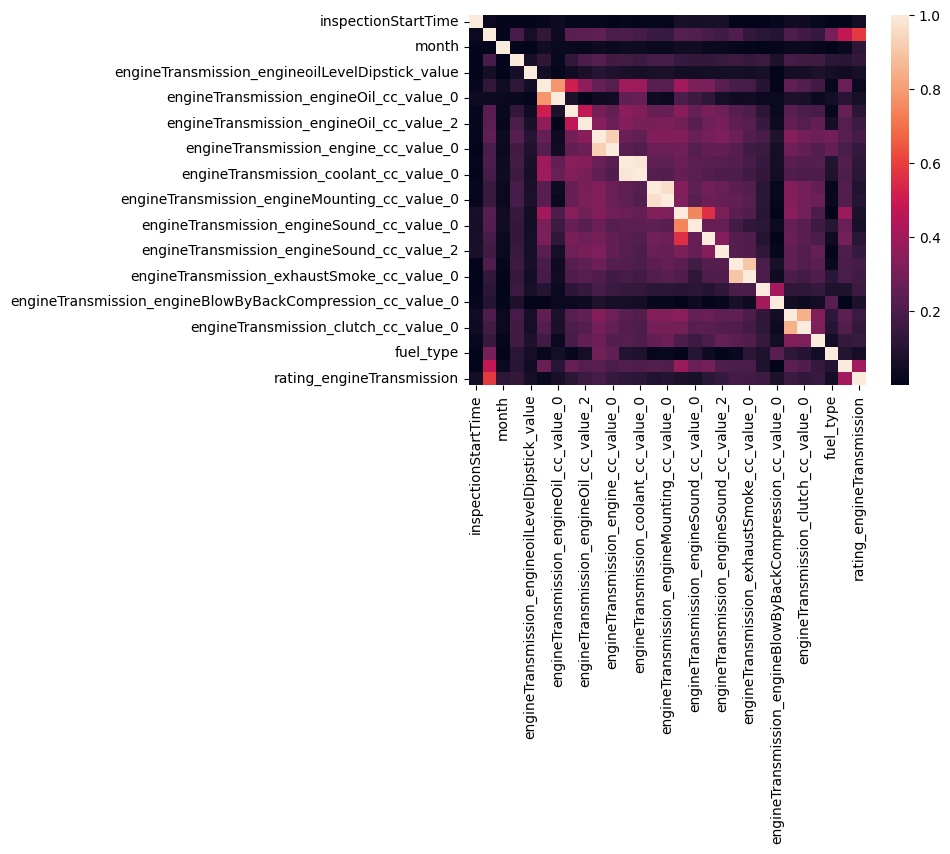

In [24]:
# checking for correlation between indpendent and dependent varaibles
df_corr = train_df#[['engineTransmission_battery_value','rating_engineTransmission']]
correlation = DataFrame(abs(df_corr.corr()))
# correlation = correlation[correlation>0.4]
sns.heatmap(correlation)
plt.show()

In [25]:
correlation

,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,...,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
inspectionStartTime,1.000000,0.027841,0.009265,0.008965,0.009507,0.018374,0.038024,0.018211,0.017200,0.014778,...,0.007690,0.004195,0.005390,0.016252,0.044454,0.043330,0.021336,0.001535,0.002079,0.050137
year,0.027841,1.000000,0.011351,0.188215,0.058107,0.132864,0.034110,0.232479,0.238730,0.246909,...,0.207521,0.133350,0.112456,0.101065,0.206784,0.175590,0.146079,0.301662,0.480452,0.588087
month,0.009265,0.011351,1.000000,0.008667,0.000494,0.044311,0.030862,0.023257,0.018401,0.035152,...,0.015957,0.009581,0.004024,0.009925,0.031532,0.025025,0.013516,0.003809,0.028379,0.119778
engineTransmission_battery_value,0.008965,0.188215,0.008667,1.000000,0.060925,0.124328,0.022109,0.130632,0.199580,0.220592,...,0.163852,0.137195,0.154550,0.077467,0.183317,0.170139,0.168535,0.112871,0.107585,0.137014
engineTransmission_engineoilLevelDipstick_value,0.009507,0.058107,0.000494,0.060925,1.000000,0.049180,0.014992,0.046356,0.069238,0.101625,...,0.060987,0.048702,0.063438,0.005607,0.053173,0.056163,0.078238,0.057833,0.045756,0.062733
engineTransmission_engineOil,0.018374,0.132864,0.044311,0.124328,0.049180,1.000000,0.783518,0.509063,0.361640,0.258515,...,0.193900,0.180590,0.100095,0.005694,0.247547,0.218360,0.175949,0.019332,0.269317,0.024752
engineTransmission_engineOil_cc_value_0,0.038024,0.034110,0.030862,0.022109,0.014992,0.783518,1.000000,0.074525,0.008979,0.041339,...,0.043186,0.046972,0.025485,0.024721,0.072274,0.068374,0.025064,0.054898,0.107136,0.066711
engineTransmission_engineOil_cc_value_1,0.018211,0.232479,0.023257,0.130632,0.046356,0.509063,0.074525,1.000000,0.476758,0.300010,...,0.226493,0.206018,0.114977,0.027756,0.228213,0.196923,0.188190,0.019628,0.263979,0.114678
engineTransmission_engineOil_cc_value_2,0.017200,0.238730,0.018401,0.199580,0.069238,0.361640,0.008979,0.476758,1.000000,0.343088,...,0.246735,0.224279,0.148350,0.034503,0.253815,0.222578,0.258008,0.055815,0.223008,0.158303
engineTransmission_engine_value,0.014778,0.246909,0.035152,0.220592,0.101625,0.258515,0.041339,0.300010,0.343088,1.000000,...,0.274439,0.210382,0.191573,0.079957,0.333822,0.300162,0.273879,0.291715,0.231231,0.182282


In [26]:
df_features = train_df.copy()
df_features['purchase_date'] = to_datetime(df_features['year'].astype(str) + '-' + df_features['month'].astype(str)) #to_datetime(dict(year=df_features['year'], month=df_features['month']))
# df_features['purchase_date'] = df_features['purchase_date'].dt.strftime('%Y-%m')
# df_features['inspectionStartTime_dy'] = df_features['inspectionStartTime'].dt.strftime('%Y-%m')
df_features['time_spent'] = (df_features['inspectionStartTime'] - df_features['purchase_date']).dt.days
df_features['time_spent_bins'] = pd.cut(df_features['time_spent'],bins=50, labels=list(range(0,50)))
df_features

,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,...,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission,purchase_date,time_spent,time_spent_bins
6682,2019-01-14 13:27:42,2015,5,1,1,1,9,8,7,1,...,1,0,3,1,4,0.481687,4.0,2015-05-01,1354,6
16687,2019-02-02 14:14:06,2013,1,1,1,0,5,0,3,0,...,1,0,6,1,3,0.438400,3.5,2013-01-01,2223,10
15535,2019-02-26 14:44:09,2017,1,1,1,1,9,8,7,1,...,1,1,7,1,3,-3.813550,5.0,2017-01-01,786,3
223,2019-02-17 15:02:33,2007,7,0,1,0,0,8,7,0,...,1,0,3,1,3,0.275073,3.0,2007-07-01,4249,19
7848,2019-03-09 16:57:30,2012,4,1,1,0,0,8,7,1,...,0,0,0,0,0,0.041337,3.5,2012-04-01,2533,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,2019-02-24 17:08:16,2010,10,1,1,0,3,8,7,0,...,1,1,7,1,4,-0.200537,3.0,2010-10-01,3068,13
25121,2019-02-09 14:26:54,2008,3,1,1,0,0,1,7,1,...,1,0,3,0,3,-0.762951,4.0,2008-03-01,3997,18
17937,2019-04-10 15:55:31,2012,1,1,1,1,9,8,7,1,...,1,1,7,1,0,-0.379690,4.0,2012-01-01,2656,12
2201,2019-01-31 12:51:03,2004,1,0,1,0,6,5,3,0,...,0,0,3,1,3,0.827721,3.0,2004-01-01,5509,25


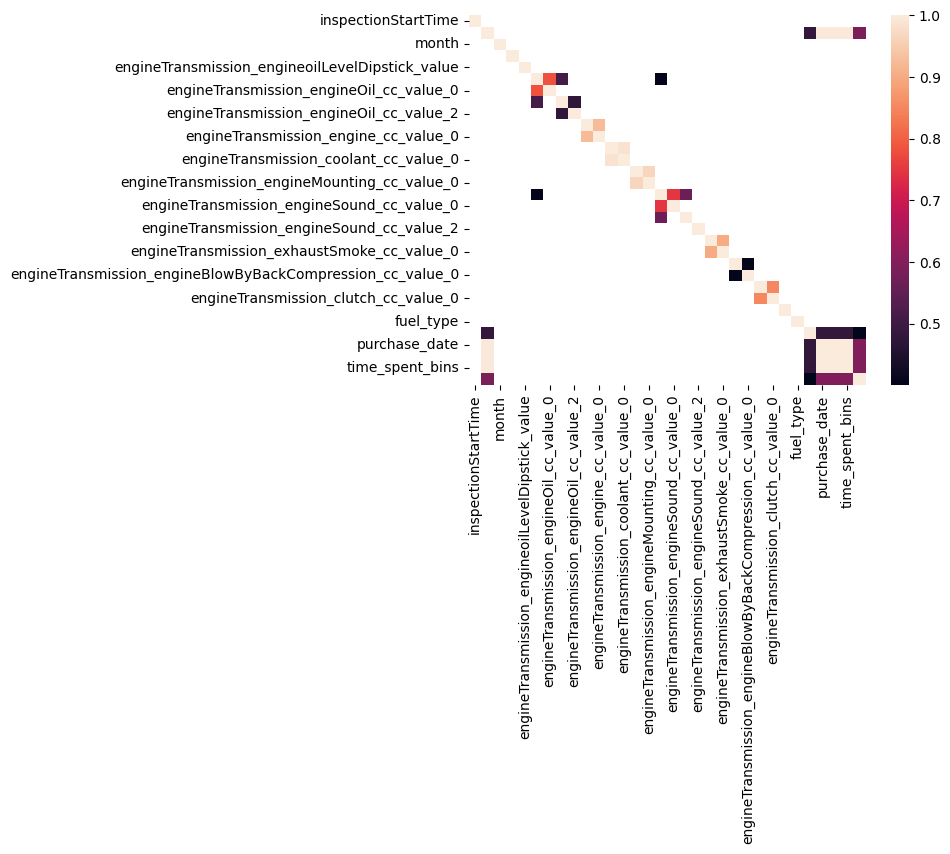

,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,...,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,purchase_date,time_spent,time_spent_bins,rating_engineTransmission
inspectionStartTime,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.480452,0.996919,0.996695,0.995675,0.588087
month,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engineTransmission_battery_value,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engineTransmission_engineoilLevelDipstick_value,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engineTransmission_engineOil,NaN,NaN,NaN,NaN,NaN,1.000000,0.783518,0.509063,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engineTransmission_engineOil_cc_value_0,NaN,NaN,NaN,NaN,NaN,0.783518,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engineTransmission_engineOil_cc_value_1,NaN,NaN,NaN,NaN,NaN,0.509063,NaN,1.000000,0.476758,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engineTransmission_engineOil_cc_value_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476758,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engineTransmission_engine_value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# checking for correlation between indpendent and dependent varaibles

column_to_move = 'rating_engineTransmission'
cols = df_features.columns.tolist()
cols.remove(column_to_move)
cols.append(column_to_move)
df_features = df_features.reindex(columns=cols)

df_corr = df_features#[['time_spent_bins','time_spent','rating_engineTransmission']]
correlation = DataFrame(abs(df_corr.corr()))
correlation = correlation[correlation>0.4]
sns.heatmap(correlation)
plt.show()
correlation

In [28]:
def filter_correlated_features(df, threshold=0.8, method='pearson'):
    """
    Filters highly correlated features from a Pandas DataFrame.

    Args:
        df: The input DataFrame.
        threshold: The correlation threshold above which features are considered highly correlated.
        method: The correlation method ('pearson', 'spearman', or 'kendall').
                 Pearson is most preferred one.

    Returns:
        A DataFrame containing only the features that are not highly correlated.
        Returns original dataframe if no columns are dropped.
        Returns empty dataframe if all columns are dropped.
    """

    corr_matrix = df.corr(method=method).abs()

    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    if to_drop:
      filtered_df = df.drop(to_drop, axis=1)
      return filtered_df
    else:
      return df  

In [29]:
dff = filter_correlated_features(df_features.drop(['rating_engineTransmission'],axis=1))
dff

,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,...,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_gearShifting_value,fuel_type,odometer_reading
6682,2019-01-14 13:27:42,2015,5,1,1,1,9,8,7,1,...,7,6,5,1,1,1,0,1,4,0.481687
16687,2019-02-02 14:14:06,2013,1,1,1,0,5,0,3,0,...,3,1,5,1,1,1,0,1,3,0.438400
15535,2019-02-26 14:44:09,2017,1,1,1,1,9,8,7,1,...,7,6,5,1,1,1,1,1,3,-3.813550
223,2019-02-17 15:02:33,2007,7,0,1,0,0,8,7,0,...,4,3,5,1,1,1,0,1,3,0.275073
7848,2019-03-09 16:57:30,2012,4,1,1,0,0,8,7,1,...,1,6,5,1,0,0,0,0,0,0.041337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,2019-02-24 17:08:16,2010,10,1,1,0,3,8,7,0,...,3,6,5,0,1,1,1,1,4,-0.200537
25121,2019-02-09 14:26:54,2008,3,1,1,0,0,1,7,1,...,4,6,5,0,1,1,0,0,3,-0.762951
17937,2019-04-10 15:55:31,2012,1,1,1,1,9,8,7,1,...,3,6,5,1,1,1,1,1,0,-0.379690
2201,2019-01-31 12:51:03,2004,1,0,1,0,6,5,3,0,...,3,6,5,1,0,0,0,1,3,0.827721


In [30]:
train_df['service_year'] = train_df['inspectionStartTime'].dt.year
train_df['service_month'] = train_df['inspectionStartTime'].dt.month
train_df.drop('inspectionStartTime',axis=1,inplace=True)
train_df['rating_engineTransmission'] = train_df['rating_engineTransmission'].replace(trgt_col_map)
train_df

,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,...,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission,service_year,service_month
6682,2015,5,1,1,1,9,8,7,1,12,...,1,1,0,3,1,4,0.481687,H,2019,1
16687,2013,1,1,1,0,5,0,3,0,3,...,1,1,0,6,1,3,0.438400,G,2019,2
15535,2017,1,1,1,1,9,8,7,1,12,...,1,1,1,7,1,3,-3.813550,J,2019,2
223,2007,7,0,1,0,0,8,7,0,3,...,1,1,0,3,1,3,0.275073,F,2019,2
7848,2012,4,1,1,0,0,8,7,1,12,...,0,0,0,0,0,0,0.041337,G,2019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,2010,10,1,1,0,3,8,7,0,6,...,1,1,1,7,1,4,-0.200537,F,2019,2
25121,2008,3,1,1,0,0,1,7,1,12,...,1,1,0,3,0,3,-0.762951,H,2019,2
17937,2012,1,1,1,1,9,8,7,1,12,...,1,1,1,7,1,0,-0.379690,H,2019,4
2201,2004,1,0,1,0,6,5,3,0,6,...,0,0,0,3,1,3,0.827721,F,2019,1


## Preprocess test data

In [31]:
## apply all the above techniques on test data

# Remove missing values columns
test_df = test_df.drop( missing_cols, axis=1)

# Use the trained encoders to transform the test data
for col, le in encoders.items():
    test_df[col] = le.transform(test_df[col])
    
#  Create service year and month columns    
test_df['service_year'] = test_df['inspectionStartTime'].dt.year
test_df['service_month'] = test_df['inspectionStartTime'].dt.month
test_df.drop(['appointmentId','inspectionStartTime'],axis=1,inplace=True)
test_df['rating_engineTransmission'] = test_df['rating_engineTransmission'].replace(trgt_col_map)


## making sure both train and test data are in same column order
# Get the column order of the train data
train_columns = train_df.columns.tolist()

# Reorder the test data to match the column order of the train data
test_df = test_df[train_columns]
test_df

,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,...,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission,service_year,service_month
23307,2009,2,1,1,0,5,0,3,0,1,...,1,1,0,3,1,0,92840,B,2019,4
13465,2016,3,1,1,0,0,8,7,1,12,...,1,2,1,7,1,3,19233,H,2019,3
3958,2010,5,1,1,0,6,5,0,1,12,...,1,1,0,6,1,0,95376,H,2019,4
10933,2011,7,1,1,0,6,5,0,0,7,...,1,1,1,7,1,0,74995,G,2019,1
9545,2017,1,1,1,1,9,8,7,1,12,...,1,1,1,7,1,0,10197,J,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11384,2012,6,1,1,1,9,8,7,0,6,...,1,3,0,3,1,4,54893,F,2019,2
24107,2013,5,1,1,1,9,8,7,0,3,...,1,2,0,3,1,4,56401,G,2019,2
7954,2008,1,0,1,0,5,0,3,0,6,...,1,1,0,3,0,3,99081,G,2019,2
17413,2009,8,1,1,0,6,5,0,0,8,...,1,1,1,7,1,0,171894,F,2019,3


# Model Selection

In [68]:
X_train = train_df.drop(['rating_engineTransmission'],axis=1)
y_train = train_df['rating_engineTransmission']
X_test = test_df.drop(['rating_engineTransmission'],axis=1)
y_test = test_df['rating_engineTransmission']

## simple base model

In [49]:
## here scaling of data is not required, since Log reg. is a statistical model

model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)
model_lg

LogisticRegression()

In [50]:
tr_pred_lr = model_lg.predict(X_test)
report = classification_report(y_test, tr_pred_lr)

# evaluate model
print("Logistic Regression Accuracy:", accuracy_score(y_test, tr_pred_lr))

print("Logistic Regression Classification Report:\n", classification_report(y_test, tr_pred_lr))

print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, tr_pred_lr))

Logistic Regression Accuracy: 0.17198783732421133
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.00      0.00      0.00       275
           D       0.00      0.00      0.00        29
           E       0.00      0.00      0.00        74
           F       0.17      1.00      0.29       906
           G       0.00      0.00      0.00      1254
           H       0.00      0.00      0.00      2010
           I       0.00      0.00      0.00       421
           J       0.00      0.00      0.00       293

    accuracy                           0.17      5262
   macro avg       0.02      0.12      0.04      5262
weighted avg       0.03      0.17      0.05      5262

Logistic Regression Confusion Matrix:
 [[   0    0    0  275    0    0    0    0]
 [   0    0    0   29    0    0    0    0]
 [   0    0    0   74    0    0    0    0]
 [   0    0    0  905    1    0    0    0]
 [   0    0    0 1254    0    0    0    0]
 

In [51]:

## Precision makes a better choice, since when the coset of false positives is high in these financial transactions
# Calculate the macro precision
macro_precision = precision_score(y_test, tr_pred_lr, average='macro')
print("Macro Precision:", macro_precision)
# Calculate the micro precision
micro_precision = precision_score(y_test, tr_pred_lr, average='micro')
print("Micro Precision:", micro_precision)

Macro Precision: 0.021506653992395437
Micro Precision: 0.17198783732421133


## Ensemble model

In [52]:
X_train

,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,...,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,service_year,service_month
6682,2015,5,1,1,1,9,8,7,1,12,...,6,1,1,0,3,1,4,0.481687,2019,1
16687,2013,1,1,1,0,5,0,3,0,3,...,6,1,1,0,6,1,3,0.438400,2019,2
15535,2017,1,1,1,1,9,8,7,1,12,...,6,1,1,1,7,1,3,-3.813550,2019,2
223,2007,7,0,1,0,0,8,7,0,3,...,6,1,1,0,3,1,3,0.275073,2019,2
7848,2012,4,1,1,0,0,8,7,1,12,...,6,0,0,0,0,0,0,0.041337,2019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,2010,10,1,1,0,3,8,7,0,6,...,4,1,1,1,7,1,4,-0.200537,2019,2
25121,2008,3,1,1,0,0,1,7,1,12,...,3,1,1,0,3,0,3,-0.762951,2019,2
17937,2012,1,1,1,1,9,8,7,1,12,...,6,1,1,1,7,1,0,-0.379690,2019,4
2201,2004,1,0,1,0,6,5,3,0,6,...,6,0,0,0,3,1,3,0.827721,2019,1


In [53]:
# define models
rf_model = RandomForestClassifier(n_estimators=100)
gb_model = GradientBoostingClassifier(n_estimators=100)
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)])


## the tree models
# train models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
voting_model.fit(X_train, y_train)

# make predictions
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
voting_pred = voting_model.predict(X_test)

# evaluate models
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_pred))

print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))
print("Voting Classifier Classification Report:\n", classification_report(y_test, voting_pred))

print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("Voting Classifier Confusion Matrix:\n", confusion_matrix(y_test, voting_pred))

Random Forest Accuracy: 0.5106423413150893
Gradient Boosting Accuracy: 0.5091220068415051
Voting Classifier Accuracy: 0.48764728240212846
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.91      0.88      0.90       275
           D       0.00      0.00      0.00        29
           E       0.20      0.01      0.03        74
           F       0.43      0.49      0.46       906
           G       0.40      0.32      0.36      1254
           H       0.54      0.69      0.61      2010
           I       0.36      0.11      0.17       421
           J       0.67      0.52      0.58       293

    accuracy                           0.51      5262
   macro avg       0.44      0.38      0.39      5262
weighted avg       0.49      0.51      0.49      5262

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           A       0.00      0.00      0.00         0
           B       0.9

In [54]:
# Calculate the macro precision
macro_precision = precision_score(y_test, rf_pred, average='macro')
print("Random Forest Macro Precision:", macro_precision)
# Calculate the micro precision
micro_precision = precision_score(y_test, rf_pred, average='micro')
print("Random Forest Micro Precision:", micro_precision)

# Calculate the macro precision
macro_precision = precision_score(y_test, gb_pred, average='macro')
print("Gradient Boosting Macro Precision:", macro_precision)
# Calculate the micro precision
micro_precision = precision_score(y_test, gb_pred, average='micro')
print("Gradient Boosting Micro Precision:", micro_precision)

# Calculate the macro precision
macro_precision = precision_score(y_test, voting_pred, average='macro')
print("Voting Classifier Macro Precision:", macro_precision)
# Calculate the micro precision
micro_precision = precision_score(y_test, voting_pred, average='micro')
print("Voting Classifier Micro Precision:", micro_precision)



Random Forest Macro Precision: 0.43937534154008884
Random Forest Micro Precision: 0.5106423413150893
Gradient Boosting Macro Precision: 0.3715327512815241
Gradient Boosting Micro Precision: 0.5091220068415051
Voting Classifier Macro Precision: 0.3379330407205602
Voting Classifier Micro Precision: 0.48764728240212846


## Neural Network

In [72]:
 
nClasses = y_train.nunique()

# Convert target variable to categorical
dn_ole = LabelEncoder()
dn_ole_mdl = dn_ole.fit(y_train)
y_train1 = dn_ole_mdl.transform(y_train)
y_test1 = dn_ole_mdl.transform(y_test)

y_train1 = to_categorical(y_train1,10)
y_test1 = to_categorical(y_test1,10)

# Define the deep neural network model
model_dnn = Sequential()
model_dnn.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(32, activation='relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(32, activation='relu'))
model_dnn.add(Dropout(0.3))
model_dnn.add(Dense(32, activation='relu'))
model_dnn.add(Dropout(0.4))
model_dnn.add(Dense(nClasses, activation='softmax'))

# Compile the model
model_dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['precision']) # 'accuracy'

# Train the model
model_dnn.fit(X_train, y_train1, epochs=100, batch_size=128, verbose=1)

# Make predictions
tr_pred_dnn = model_dnn.predict(X_test)
tr_pred_dnn_class = np.argmax(tr_pred_dnn, axis=1)
y_test_class = np.argmax(y_test1, axis=1)


Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 141.4126 - precision: 0.1554
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3689 - precision: 0.1935
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3365 - precision: 0.2342
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9861 - precision: 0.2653
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8475 - precision: 0.2430
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8040 - precision: 0.3094
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7633 - precision: 0.3231
Epoch 8/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7370 - precision: 0.3613
Epoch 9/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7337 - precision: 0.3085
Epoch 10/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6951 - precision: 0.3291
Epoch 11/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7060 - precision: 0.3166
Epoch 12/100
165/165 ━━━━━━━

In [73]:

# # Evaluate the model
print("Deep Neural Network precision score-macro:", precision_score(y_test_class, tr_pred_dnn_class, average='macro'))
print("Deep Neural Network precision score-micro:", precision_score(y_test_class, tr_pred_dnn_class, average='micro'))

print("Deep Neural Network Classification Report:\n", classification_report(y_test_class, tr_pred_dnn_class))
print("Deep Neural Network Confusion Matrix:\n", confusion_matrix(y_test_class, tr_pred_dnn_class))

Deep Neural Network precision score-macro: 0.06539488770305601
Deep Neural Network precision score-micro: 0.36887115165336376
Deep Neural Network Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       275
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        74
           5       0.06      0.00      0.00       906
           6       0.07      0.02      0.03      1254
           7       0.39      0.95      0.55      2010
           8       0.00      0.00      0.00       421
           9       0.00      0.00      0.00       293

    accuracy                           0.37      5262
   macro avg       0.07      0.12      0.07      5262
weighted avg       0.18      0.37      0.22      5262

Deep Neural Network Confusion Matrix:
 [[   0    0    0    0    3  272    0    0]
 [   0    0    0    0    0   29    0    0]
 [   0    0    0    0    0   74    0    0]
 [   0    0

# Model Training and Evaluation

In [ ]:
## from the above experimentation it is evident that an Ensemble model would be a better choice


# Model Fine Tuning

# End